# Introduction to Computational Physics: Homework 1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Numerical Integration

In this exercise we will numerically evaluate the integral $$y_n = y_n(a) = \int_0^1 \left(\frac{x^n}{x+a}\right) dx = \frac{1}{n} - a y_{n-1}$$

(a) Plot the integrand for a = 5 and n = 1, 5, 10, 20, 30, 50 in the domain 0 $<$ x $<$ 1.

In [2]:
# Values
nvalues = np.array([1, 5, 10, 20, 30, 50])
a = 5

# integrand
def integrand(x, a, n):
    return (x**n)/(x+a)

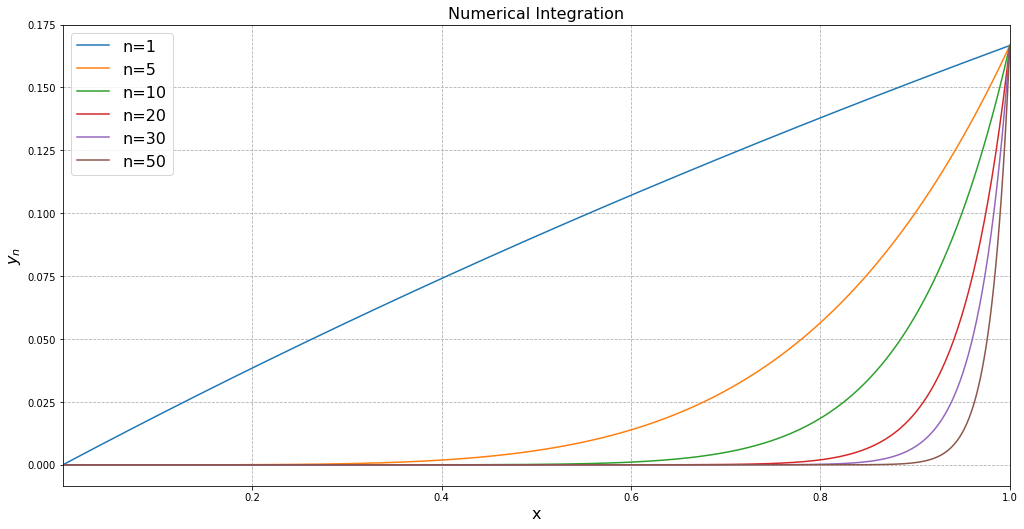

In [3]:
# Plot settings
font = {'weight': 'normal','size': 16}
plt.figure(figsize=((99/70)*12, (70/99)*12))
plt.grid(which='both', linestyle='--')
plt.xlabel('x', font)
plt.ylabel('$y_n$', font)
plt.title('Numerical Integration', font)
plt.xlim(1e-10, 1-1e-10)

# Plot
xvalues = np.linspace(0, 1, 1000)
for n in nvalues:
    plt.plot(xvalues, integrand(xvalues, a, n), label='n='+str(n))
    
plt.legend(loc='upper left', prop=font)

(b) Write a computer program that reads the value of $a$, the starting values $n_0$ and $y_0$, and
the final value $n_1$, and performs the iteration from $n_0$ to $n_1$ (either backward or forward,
depending on whether $n_1$ $<$ $n_0$ or $n_1$ $>$ $n_0$).

In [4]:
def integral(a, n0, n1, y0):
    if n0 == 0 or n1 == 0:
        return(print('Integral cannot be evaluated because of division by zero.\nPlease choose different input values.\n'))
    #if n0 == n1:
        #print('Integral cannot be evaluated because: n0 = n1.\nPlease choose different input values.\n')
    if n0 > n1:
        integral(a, n1, n0, y0)
    if n0 <= n1:
        yn1 = y0;
        print('n0 < n1 [n0='+str(n0),'; n1='+str(n1)+']');
        while (n0 < n1):
            #print(n0)
            #print(yn1)
            yn1 = 1/n0 - a*yn1
            #print(yn1)
            n0 = n0+1
        return(print('y'+str(n0-1)+' =', yn1, '\n'))


In [ ]:
#@Jana We modified your function so that now 0 works as an input.
# This is because we interpreted the exercise as:
# if both values n0 and n1 are zero then it should be the same as inserting 0 for n into the equation
# which gives you y0
# we didn't look at the recursive part of the equation but the integral. (Hope that makes sense?)

def integral(a, n0, n1, y0):
    if n0 == 0 and n1 == 0: #This ensures that the iteration from 0 to 0 gives the start value y0.
        yn1 = y0
        print('[n0='+str(n0),'; n1='+str(n1)+']')
        return(print('y'+str(0)+' =', yn1, '\n'))
    if n0 > n1: #Swaps values so that the smaller is the start value
                #@Jana bei c) hab ich nachträglich noch Gedanken hierzu gehabt...
        integral(a, n1, n0, y0) #Choose y0 so that it corresponds to min(n1, n0)!
    if n0 <= n1:
        yn1 = y0
        print('[n0='+str(n0),'; n1='+str(n1)+']')
        n = n0 + 1 #see comment below
        while (n < (n1+1)): #iteration happens here
            yn1 = 1/n - a*yn1
            n = n+1
        return(print('y'+str(n-1)+' =', yn1, '\n'))

#n0 and y0 belong together. The goal of the function is to calculate the integral yn(a). The input n1 gives the solution for *yn1(a)* of the integral (see exercise sheet).

For $y_0$ we choose the following value: $$y_0(a) = \int_0^1 \left(\frac{x^0}{x+a}\right) dx= \left[ \log(x+a)\right]_0^1 = \log(1+a)-\log(a)$$

In [13]:
# Input values
a = int(input('Please enter the value of a: '))
n0 = int(input('Please enter the value of n0: '))
n1 = int(input('Please enter the value of n1: '))
#y0 = int(input('Please enter the value of y0: '))
y0 = np.log(1+a)-np.log(a)
print('\nInput values:\na = ', a,';  n0 = ', n0, ';  n1 = ', n1, ';  y0 = ', y0)

Please enter the value of a: 5
Please enter the value of n0: 1
Please enter the value of n1: 6

Input values:
a =  5 ;  n0 =  1 ;  n1 =  6 ;  y0 =  0.18232155679395468


In [ ]:
#@Jana if we add this part then y0 will be set to the 'correct'/ sensible(?) value if n0 is 0 or 1...
#What do you think?

if n0 == 0:
    y0 = np.log(1+a)-np.log(a)
elif n0 == 1:
    y0 = a * np.log(a) - a * np.log(a + 1) + 1
else:
    y0 = int(input('Please enter the value of y0: '))

In [14]:
integral(a, n0, n1, y0)

n0 < n1 [n0=1 ; n1=6]
y5 = 0.028468352224971905 



In [15]:
for i in range(12):
    integral(5, 1, i, np.log(1+5)-np.log(5))

Integral cannot be evaluated because of division by zero.
Please choose different input values.

n0 < n1 [n0=1 ; n1=1]
y0 = 0.18232155679395468 

n0 < n1 [n0=1 ; n1=2]
y1 = 0.08839221603022662 

n0 < n1 [n0=1 ; n1=3]
y2 = 0.05803891984886689 

n0 < n1 [n0=1 ; n1=4]
y3 = 0.043138734088998876 

n0 < n1 [n0=1 ; n1=5]
y4 = 0.03430632955500562 

n0 < n1 [n0=1 ; n1=6]
y5 = 0.028468352224971905 

n0 < n1 [n0=1 ; n1=7]
y6 = 0.024324905541807135 

n0 < n1 [n0=1 ; n1=8]
y7 = 0.021232615148107176 

n0 < n1 [n0=1 ; n1=9]
y8 = 0.018836924259464122 

n0 < n1 [n0=1 ; n1=10]
y9 = 0.016926489813790496 

n0 < n1 [n0=1 ; n1=11]
y10 = 0.015367550931047524 



Reference from WolframAlpha:<br>
y0 $\approx$ 0.182322<br>
y1 $\approx$ 0.088392<br>
y2 $\approx$ 0.058039<br>
y3 $\approx$ 0.043139<br>
y4 $\approx$ 0.034306<br>
y5 $\approx$ 0.028468<br>
y6 $\approx$ 0.024325<br>
y7 $\approx$ 0.021233<br>
y8 $\approx$ 0.018837<br>
y9 $\approx$ 0.016926<br>
y10 $\approx$ 0.015368<br>

(c) Experiment how this series behaves for iterations from $n_0$ = 0 to $n_1$ = 30 for $y_0 = \ln\left[\frac{(1 + a)}{a}\right]$ with $a$ = 5.
Also try starting with $n_0$ = 50 and iterate back to $n_1$ = 30 for any starting value $y_0$.

In [ ]:
#@Jana Here's our experimentation and results/ thoughts:

for i in range(30):
    integral(5, 0, i, np.log(6/5))

We would expect the series to converge to 0 for larger n1 values. However, our program does not give us the results we expect. Instead, our program spirals out of control...
n1 = 10 gives a result accurate to the xx-th digit, for n1 = 17 the 5th digit is inaccurate. From n1 = 21 onwards the values increase and/or become negative, which is definitely inaccurate.

In [ ]:
integral(5, 50, 30, 0.005404632965140679197756)

This y0 is the solution to the integral for n=30 (taken from wolfram alpha) which is the logical starting value here. Any other starting value gives very large results.

In [ ]:
#@Jana do you think that we are iterating backwards correctly?
#I like the solution of just swapping the values if n1 < n0... But is that what they want here?

#Lea suggests nach y(n-1) umstellen und eine analoge while Schleife für den Fall n1 < n0 zu schreiben? 

In [8]:
integral(5, 0, 30, np.log((1+5)/5))

Integral cannot be evaluated because of division by zero.
Please choose different input values.



In [9]:
# y0 = np.log((1+5)/5)
integral(5, 50, 30, np.log((1+5)/5))

n0 < n1 [n0=30 ; n1=50]
y49 = 16854840919524.77 



In [10]:
# y0 = 5
integral(5, 50, 30, 5)

n0 < n1 [n0=30 ; n1=50]
y49 = 476304460518489.9 



In [11]:
# y0 = 100
integral(5, 50, 30, 100)

n0 < n1 [n0=30 ; n1=50]
y49 = 9536210466377868.0 



In [12]:
# y0 = np.log(1+a)-np.log(a)
integral(5, 50, 30, np.log(1+5)-np.log(5))

n0 < n1 [n0=30 ; n1=50]
y49 = 16854840919524.781 

